## Exploratory Data Analysis

### Statistics

In [3]:
# Install Dependencies

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
df = pd.read_csv(os.path.join('data', 'news.csv'))
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
print("Dimensions:", df.shape)
df.isnull().sum()

Dimensions: (6335, 4)


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
df.describe(include='all')

,Unnamed: 0,title,text,label
count,6335.000000,6335,6335,6335
unique,NaN,6256,6060,2
top,NaN,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,NaN,5,58,3171
mean,5280.415627,NaN,NaN,NaN
std,3038.503953,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN
25%,2674.500000,NaN,NaN,NaN
50%,5271.000000,NaN,NaN,NaN
75%,7901.000000,NaN,NaN,NaN


In [7]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [8]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

### Visualisations

<Axes: xlabel='label', ylabel='text_length'>

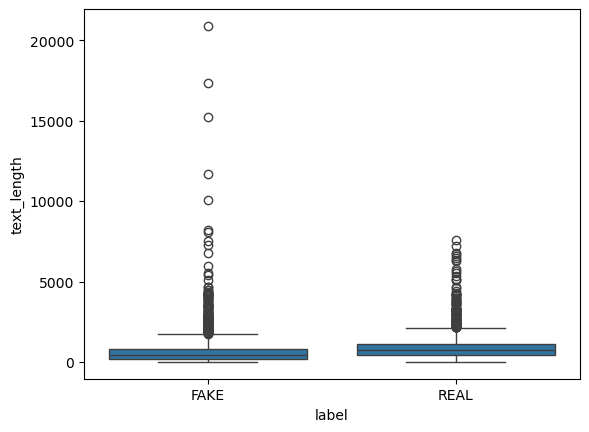

In [10]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))

sns.boxplot(data=df, x='label', y='text_length')

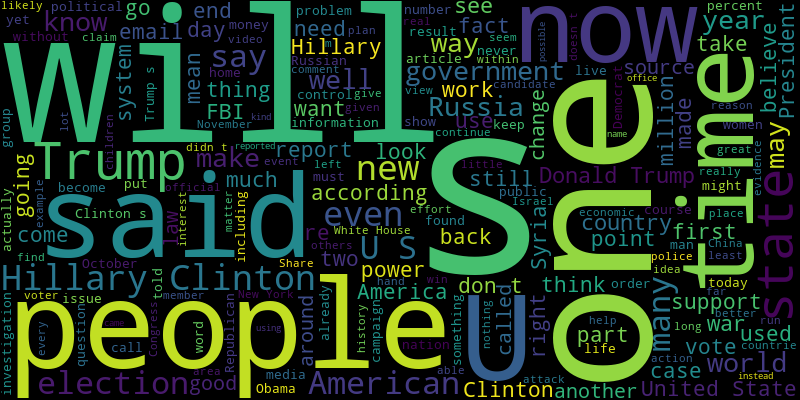

In [ ]:
fake_text = " ".join(df[df['label']=='FAKE']['text'])
real_text = " ".join(df[df['label']=='REAL']['text'])

WordCloud(width=800, height=400).generate(fake_text).to_image()
WordCloud(width=800, height=400).generate(real_text).to_image()